# NW Missouri State University 44608 Module 7 - Machine Learning

- Author: Aaron Gillespie
- Date: 2025-02-26
- Repo: [On GitHub](https://github.com/aarongilly/datafun-07-ml)
- Purpose:
Completing the 7th and final module of 44608, **Data Analytics Fundamentals**, with this introduction to machine learning with Python and Jupyter Notebooks (specifically *this notebook you're reading now*).

I'll be following along with sections 10.16 and 15.4 from [the textbook](https://www.pearson.com/en-us/subject-catalog/p/intro-to-python-for-computer-science-and-data-science-learning-to-program-with-ai-big-data-and-the-cloud/P200000003444/9780135404676).

In [14]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Chart a Straight Line

Following along with section 10.16. We'll use a simple line chart to plot the conversion function between Fahrenheit and Celius using the formula:

```plaintext
c = 5 / 9 * (f - 32)
```

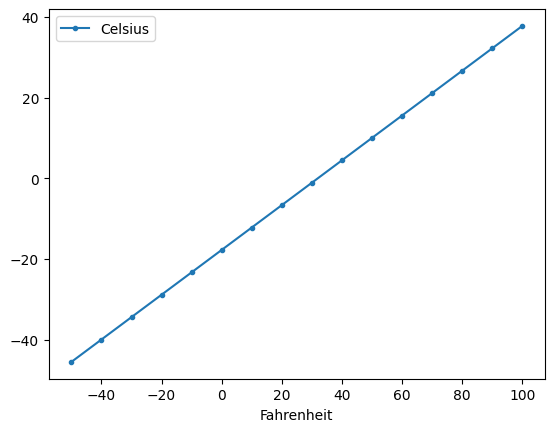

In [ ]:
# Creating a lambda function mostly as a demo that lambda functions exist
c = lambda f: 5 / 9 * (f - 32)

# Fillling a list with tuples
temps = [(f, c(f)) for f in range( -50, 101, 10)]

# Creating a DataFrame from the list of tuples
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')